# Project 2
Choose any three of the “wide” datasets identified in the Week 5 Discussion items.

• Create a .CSV file (or optionally, a MySQL database!) that includes all of the information
included in the dataset. You’re encouraged to use a “wide” structure similar to how the
information appears in the discussion item, so that you can practice tidying and
transformations as described below.

• Read the information from your .CSV file into Python, and use pandas as needed to tidy
and transform your data.

In [2119]:
import numpy as np
import pandas as pd
import re


## Dataset 1 Video Game Sales
Link: https://www.kaggle.com/code/islamaljuneidi/video-game-sales-project/notebook
- Which Game has the highest Sales?
- Which Game has the lowest Sales?

In [2120]:
df_games= pd.read_csv(r'C:\Users\HP\OneDrive\DEsktop\vgsales.csv')

In [2121]:
df_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### Now we will need to assess the data for any duplicates or missing values.

In [2122]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [2123]:
# We now from displaying the dataframe that the shape is (16598, 11). So we will now find the size, number of unique columns, and the amount of missing values.
df_games.size

182578

In [2124]:
df_games.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [2125]:
df_games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [2126]:
#From looking at Raw data I am aware of duplicates located in specific columns.
df_games[df_games.duplicated(subset=["Name","Genre","Platform","Publisher"],keep="last")]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


#### Let's Clean the Data :)
Here we will rename, reformat, and remove columns from the dataset to allow ut to be easily read and understood.

In [2127]:
df_games.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [2128]:
# NA, EU, and JP will be renamed to North American, European, and Japan for clarity.
columns=['Rank', 'Name', 'Genre', 'Platform', 'Publisher', 'North_America_Sales','urope_Sales', 'Japan_Sales', 'Other_Sales', 'Global_Sales', 'Year']
df_games=df_games.rename(columns={"NA_Sales":"North_America_Sales","EU_Sales":"European_Sales","JP_Sales":"Japan_Sales"})

### Optional Cleaning
#### The Rank column gives the same data as the index, dropping it will allow for a cleaner appearance.
#### However, it will not effect the data if left. For purpose of appearance I will be removing it.

In [2129]:
df_games.drop(columns="Rank",inplace=True)

In [2130]:
df_games.head(2)

,Name,Platform,Year,Genre,Publisher,North_America_Sales,European_Sales,Japan_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [2131]:
#  Look over changes made to data.
df_games

,Name,Platform,Year,Genre,Publisher,North_America_Sales,European_Sales,Japan_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### Let's answer the two posed questions
1. The game with the highest sales?

In [2132]:
df_games[['Name', 'Genre', 'Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)


,Name,Genre,Global_Sales
0,Wii Sports,Sports,82.74
1,Super Mario Bros.,Platform,40.24
2,Mario Kart Wii,Racing,35.82
3,Wii Sports Resort,Sports,33.00
4,Pokemon Red/Pokemon Blue,Role-Playing,31.37
5,Tetris,Puzzle,30.26
6,New Super Mario Bros.,Platform,30.01
7,Wii Play,Misc,29.02
8,New Super Mario Bros. Wii,Platform,28.62
9,Duck Hunt,Shooter,28.31


Wii Sports has the highest Sales Globally.

2. Which game  has the lowest Sales?

In [2133]:
df_games[['Name', 'Genre', 'Global_Sales']].sort_values('Global_Sales', ascending=True).head(1)



,Name,Genre,Global_Sales
16597,Spirits & Spells,Platform,0.01


Spirits and Spells has the lowest sales out of all games.

## Dataset 2 Movie Visualization and Recommendation System
Link: https://www.kaggle.com/code/chanoncharuchinda/movie-visualization-and-recommendation-system

1. Highest Grossing Movie?
2. Top Movie Genre?

In [2134]:
df_movies= pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\movies.csv')

In [2135]:
df_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [2136]:
#Checking Data for missing Values.
df_movies.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [2137]:
#Display movie info.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


### Let's Clean the data :)


In [2138]:
# The data has a "\n" featured in several columns disrupting the text written within. Let's remove it to give it a cleaner appearance.
for col in ['GENRE','ONE-LINE','STARS']:
    df_movies[col] = df_movies[col].str.replace("\n","").str.strip()

In [2139]:
#Check to make sure changes took place.
df_movies.head(2)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN


In [2140]:
#The column 'Stars' is over crowded as it features the main cast as well as the director. These should be separated for people looking for movies by specific directors or Actors.
def extract_director(direc):
    if 'Director' in direc or 'Directors' in direc:
        director = direc.strip().split("|")[0] # The Second Half is the stars
        return director.split(":")[1] # Return the Director name
    else:
        return ''

def extract_stars(stars):
    if 'Star' not in stars or 'Stars' not in stars:
        return ''
    else:
        return stars.split(":")[-1] # last value in this list will be the stars

df_movies['Director'] = df_movies['STARS'].apply(lambda d: extract_director(d))
df_movies['Stars'] = df_movies['STARS'].apply(lambda s: extract_stars(s))


In [2141]:
#Check changes
df_movies.head(2)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."


In [2142]:
#Let's remove completely the column stars now for a neater look.
df_movies.drop('STARS', axis=1, inplace=True)

In [2143]:
#Check Changes made to data.
df_movies.head(2)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."


#### Question Time
1. Highest Grossing Movie?

In [2144]:
#Remove movies with no value in Gross
gross_df = df_movies[~df_movies['Gross'].isna()]

In [2145]:
#For this question it helped to separatley identify the highest gross as using ascending displayed the wrong Movie as highest grossing film.
gross_df['Gross'] = gross_df['Gross'].apply(lambda g: extract_gross(g))
gross_df.iloc[gross_df['Gross'].argmax()][['MOVIES','GENRE', 'Gross']]


C:\Users\HP\AppData\Local\Temp\ipykernel_67804\3165061726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_df['Gross'] = gross_df['Gross'].apply(lambda g: extract_gross(g))


MOVIES        Beauty and the Beast
GENRE     Family, Fantasy, Musical
Gross                       504.01
Name: 329, dtype: object

Beauty and the Beast is the highest grossing film within this data with $504.01M.
2. Top Movie Genre?

In [2146]:
df_movies[['MOVIES', 'GENRE', 'RATING']].sort_values('RATING', ascending=False).head(10)


,MOVIES,GENRE,RATING
8510,Avatar: The Last Airbender,"Animation, Action, Adventure",9.9
7640,BoJack Horseman,"Animation, Comedy, Drama",9.9
9892,Dexter,"Crime, Drama, Mystery",9.8
8509,Avatar: The Last Airbender,"Animation, Action, Adventure",9.8
8637,She-Ra and the Princesses of Power,"Animation, Action, Adventure",9.7
7159,Avatar: The Last Airbender,"Animation, Action, Adventure",9.7
8629,She-Ra and the Princesses of Power,"Animation, Action, Adventure",9.7
8767,Dark,"Crime, Drama, Mystery",9.7
8541,The Midnight Gospel,"Animation, Adventure, Comedy",9.7
8766,Dark,"Crime, Drama, Mystery",9.6


Avatar: The Last Airbender has the highest rating with 9.9
3. Top Movie Genre?

In [2147]:
#For this we will need to compare how many movies are featured of each genre.
movie_genre = df_movies['GENRE'].value_counts().reset_index().rename(columns={'GENRE':'Count','index':'Genre'})

In [2148]:
movie_genre


,Genre,Count
0,Comedy,852
1,"Animation, Action, Adventure",693
2,Drama,562
3,Documentary,498
4,"Crime, Drama, Mystery",336
...,...,...
505,"Fantasy, Horror, Romance",1
506,"Family, Music, Romance",1
507,"Fantasy, Music",1
508,"Comedy, Family, Sci-Fi",1


Out of all genre possibility (single genre and mixed) Comedy has the most featured movies.

## Dataset 3 Pizza Price Data
Link: https://www.kaggle.com/code/knightbearr/analysis-pizza-price-data-knightbearr
1. Average Pricing of Pizza
2. Most Expensive Pizza
3. Which brand offers more choices

In [2149]:
#import dateframe
df_pizza= pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\pizza_data.csv')
df_pizza

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99
...,...,...,...,...,...
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",$23.85
367,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Small (10"")",$11.80
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Medium (12"")",$14.95
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",$18.65


In [2150]:
# Check the data!
df_pizza.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     371 non-null    object
 1   Pizza Name  371 non-null    object
 2   Type        371 non-null    object
 3   Size        371 non-null    object
 4   Price       371 non-null    object
dtypes: object(5)
memory usage: 14.6+ KB


In [2151]:
# Keep checking
df_pizza.isnull().sum()

Company       0
Pizza Name    0
Type          0
Size          0
Price         0
dtype: int64

In [2152]:
#All values are present.


#### Let's Clean the Data :)

In [2153]:
#analyze the data
df_pizza.head(2)

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99


Viewing the format of this data, it does not appear untidy. However,we can remove the '$' symbol as well as the inch of the pizzas under 'size'.

In [2154]:
df_pizza["Price"] = df_pizza["Price"].str.replace("$", "").astype("float64")


C:\Users\HP\AppData\Local\Temp\ipykernel_67804\2094793800.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_pizza["Price"] = df_pizza["Price"].str.replace("$", "").astype("float64")


In [2155]:
#string needs to be created to remove pizza diameter
def get_size(size):
        return size.split(" ")[0]
df_pizza["Size"] = df_pizza["Size"].apply(lambda x: get_size(x))

In [2156]:
df_pizza.head(2)


,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,Small,5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,Medium,7.99


In [2157]:
#Great, let's describe the data.
df_pizza.describe()


,Price
count,371.000000
mean,16.319326
std,5.714662
min,4.290000
25%,12.490000
50%,15.490000
75%,19.950000
max,29.990000


Let's answer the questions.
1. Average Pizza Pricing?

In [2158]:
#Instead of finding the average of all 4 brands together we will use groupby, to separate the brands.
avg_pricing =df_pizza.groupby("Company")["Price"].agg(["max","min","mean"])

In [2159]:
avg_pricing

,max,min,mean
Company,,,
Domino's Pizza,17.99,5.99,14.291136
Godfather's Pizza,29.99,4.99,20.271128
IMO's Pizza,23.85,9.30,17.102083
Pizza Hut,18.49,4.29,13.415397


2. Most Expensive Pizza?

In [2160]:
#We wll separate the companies to show the highest to lowest price.
#First Dominoes
Dom_df=df_pizza[(df_pizza["Company"]=="Domino's Pizza")]
Dom_df.sort_values(by="Price",ascending=False)


,Company,Pizza Name,Type,Size,Price
43,Domino's Pizza,Fiery Hawaiian™ (Brooklyn Style),Specialty Pizzas,X-Large,17.99
33,Domino's Pizza,Pacific Veggie (Brooklyn Style),Specialty Pizzas,X-Large,17.99
59,Domino's Pizza,America's Favorite Feast® (Brooklyn Style),Feast Pizzas,X-Large,17.99
65,Domino's Pizza,Bacon Cheeseburger Feast® (Brooklyn Style),Feast Pizzas,X-Large,17.99
18,Domino's Pizza,Wisconsin 6 Cheese (Brooklyn Style),Specialty Pizzas,X-Large,17.99
...,...,...,...,...,...
5,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,Medium,7.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,Medium,7.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,Medium,7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,Small,5.99


In [2161]:
#Pizza Hut next.
PHut_df=df_pizza[(df_pizza["Company"]=="Pizza Hut")]
PHut_df.sort_values(by="Price",ascending=False)


,Company,Pizza Name,Type,Size,Price
158,Pizza Hut,Chicken Supreme Pizza (Stuffed Crust),Classic Recipe Pizzas,Large,18.49
185,Pizza Hut,Super Supreme Pizza (Stuffed Crust),Classic Recipe Pizzas,Large,18.49
149,Pizza Hut,BBQ Lover's™ (Stuffed Crust),Classic Recipe Pizzas,Large,17.49
113,Pizza Hut,Meat Lover's® Pizza (Stuffed Crust),Classic Recipe Pizzas,Large,17.49
131,Pizza Hut,Veggie Lover's® Pizza (Stuffed Crust),Classic Recipe Pizzas,Large,17.49
...,...,...,...,...,...
126,Pizza Hut,Veggie Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,4.79
117,Pizza Hut,Ultimate Cheese Lover's Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,4.79
108,Pizza Hut,Meat Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,4.79
99,Pizza Hut,Pepperoni Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,4.79


In [2162]:
#GodFather's pizza
GodF_df=df_pizza[(df_pizza["Company"]=="Godfather's Pizza")]
GodF_df.sort_values(by="Price",ascending=False)


,Company,Pizza Name,Type,Size,Price
295,Godfather's Pizza,Super Combo Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,29.99
313,Godfather's Pizza,The Don (Original or Thin Crust),Specialty Pizzas,Jumbo,29.99
307,Godfather's Pizza,Super Taco Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,29.99
301,Godfather's Pizza,Super Hawaiian Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,29.99
319,Godfather's Pizza,Super Veggie Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,28.99
...,...,...,...,...,...
269,Godfather's Pizza,Hawaiian Pizza (Original Crust),Specialty Pizzas,Mini,5.99
276,Godfather's Pizza,BLT Pizza (Original Crust),Specialty Pizzas,Mini,5.99
283,Godfather's Pizza,Buffalo Chicken Pizza (Original Crust),Specialty Pizzas,Mini,5.99
340,Godfather's Pizza,Original Crust,Express Favorites,Mini,4.99


In [2163]:
#IMO is last
IMO_df=df_pizza[(df_pizza["Company"]=="IMO's Pizza")]
IMO_df.sort_values(by="Price",ascending=False)

,Company,Pizza Name,Type,Size,Price
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,X,23.85
350,IMO's Pizza,Deluxe Pizza,Specialty Pizzas,X,23.85
362,IMO's Pizza,All Meat Pizza,Specialty Pizzas,X,23.85
354,IMO's Pizza,Veggie Pizza,Specialty Pizzas,X,23.85
370,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,X,22.30
349,IMO's Pizza,Deluxe Pizza,Specialty Pizzas,Large,19.95
361,IMO's Pizza,All Meat Pizza,Specialty Pizzas,Large,19.95
353,IMO's Pizza,Veggie Pizza,Specialty Pizzas,Large,19.95
365,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,Large,19.20
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,Large,18.65


GodFather's Pizza has the highest Pizza pricing overall with 29.99.
Individually Dominoes the highest prices is: 17.99
PizzaHut: 18.49
IMO: 23.85

3. Which brand offers more choices

c:\users\hp\pycharmprojects\pythonproject18\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company', ylabel='count'>

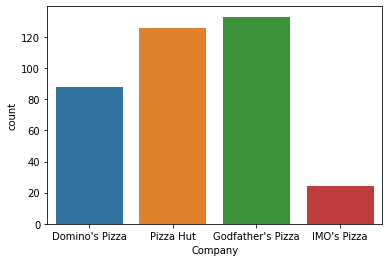

In [2164]:
#This should be fairly simple.
import seaborn as sns
#seaborn is a data visualisation tool.
sns.countplot(df_pizza["Company"])


#### GodFather's Pizza has the most entries in the dataframe with PizzaHut close behind.
